# Which college district has the fewest low-income families?

A pilot program was run by a local cable operator in the county to provide low-cost computers and Internet access to low-income families with kids in high school. This showed a marked improvement in school performance for these kids, and the program has brought the company a fair amount of positive publicity and goodwill in the community.

Company officials now want to set up a similar program for community college students. The company provides Internet access to the five community college districts in the county, and officials are aware that the colleges are under a lot of pressure - they are facing funding cuts at the same time as increased demand for enrollment. To try to improve the situation the colleges are turning more and more to distance learning, primarily via the Internet. By providing computers and Internet access, the cable company can enable more low-income students to take advantage of online classes.

This case study uses ArcGIS API for Python to find districts that have the fewest low income families in order to empower these students.

We will use ``summarize_within`` tool to get the number of low-income families within each community district. We will also visualize this using the map widget.

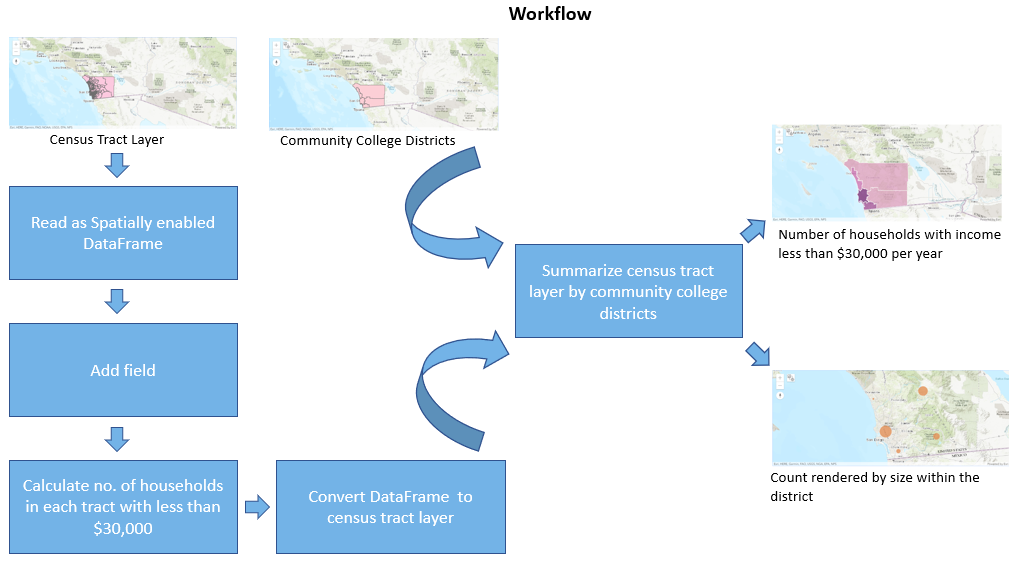

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Connect-to-your-ArcGIS-Online-organization" data-toc-modified-id="Connect-to-your-ArcGIS-Online-organization-2">Connect to your ArcGIS Online organization</a></span></li><li><span><a href="#Get-data-for-analysis" data-toc-modified-id="Get-data-for-analysis-3">Get data for analysis</a></span></li><li><span><a href="#Find-the-community-college-district-with-the-fewest-low-income-families" data-toc-modified-id="Find-the-community-college-district-with-the-fewest-low-income-families-4">Find the community college district with the fewest low-income families</a></span></li><li><span><a href="#Get-the-number-of-low-income-households-in-each-district" data-toc-modified-id="Get-the-number-of-low-income-households-in-each-district-5">Get the number of low-income households in each district</a></span></li><li><span><a href="#Visualization-to-show-district-with-fewest-households" data-toc-modified-id="Visualization-to-show-district-with-fewest-households-6">Visualization to show district with fewest households</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7">Conclusion</a></span></li></ul></div>

### Connect to your ArcGIS Online organization


We first establish a connection to our organization which could be an ArcGIS Online organization or an ArcGIS Enterprise. To be able to run the code using ArcGIS API for Python, we will need to provide credentials of a user within an ArcGIS Online organization.

In [2]:
from arcgis.gis import GIS
import pandas as pd

Please sign-in into your organization to continue to execute this notebook.

In [3]:
gis = GIS('home')

## Get data for analysis

In [4]:
san_diego_data = gis.content.search('title:CommunityCollege_CensusTracts owner:api_data_owner', 
                                 'Feature layer',
                                  outside_org=True)

In [5]:
san_diego_data

[<Item title:"CommunityCollege_CensusTracts" type:Feature Layer Collection owner:api_data_owner>]

<Item title:"CommunityCollege_CensusTracts" type:Feature Layer Collection owner:api_data_owner>
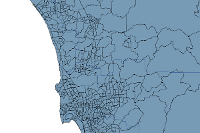

In [6]:
from IPython.display import display

for item in san_diego_data:
    display(item)

In [7]:
san_diego_item = san_diego_data[0] # get first item from the list of items

In [8]:
for lyr in san_diego_item.layers:
    print(lyr.properties.name)

census_tract_income
Community_College_Dist


Since the item is a Feature Layer Collection, accessing the layers property will give us a list of Feature Layers.

In [9]:
census_tract_income = san_diego_item.layers[0]

In [10]:
community_college_dist = san_diego_item.layers[1] 

In [11]:
m1 = gis.map('San Diego')
m1

MapView(layout=Layout(height='400px', width='100%'))

![image](https://user-images.githubusercontent.com/13968196/232949550-9f4d58c6-e1bd-4c9c-9ecc-45081830a207.png)

In [12]:
m1.add_layer(community_college_dist)

In [13]:
m2 = gis.map('San Diego')
m2

MapView(layout=Layout(height='400px', width='100%'))

In [13]:
m2.add_layer(census_tract_income)

![image](https://user-images.githubusercontent.com/13968196/232949743-643f7107-84aa-49cd-9be0-9a2b6c36bbf9.png)

### Find the community college district with the fewest low income families

Convert the layer into pandas dataframe to calculate the number of households in each tract with income less than $30,000.

In [14]:
sdf = pd.DataFrame.spatial.from_layer(census_tract_income)

In [15]:
sdf.columns

Index(['FID', 'TRACT', 'INCOME_ALL', 'INCOME_LES', 'INCOME_10K', 'INCOME_15K',
       'INCOME_20K', 'INCOME_25K', 'INCOME_30K', 'INCOME_35K', 'INCOME_40K',
       'INCOME_45K', 'INCOME_50K', 'INCOME_60K', 'INCOME_75K', 'INCOME_100',
       'INCOME_125', 'INCOME_150', 'INCOME_200', 'Shape__Area',
       'Shape__Length', 'SHAPE'],
      dtype='object')

In [16]:
sdf.head()

,FID,TRACT,INCOME_ALL,INCOME_LES,INCOME_10K,INCOME_15K,INCOME_20K,INCOME_25K,INCOME_30K,INCOME_35K,...,INCOME_50K,INCOME_60K,INCOME_75K,INCOME_100,INCOME_125,INCOME_150,INCOME_200,Shape__Area,Shape__Length,SHAPE
0,1,7700,4148,243,205,158,195,229,279,278,...,445,526,370,379,73,127,125,1724049.019531,6919.424522,"{""rings"": [[[-13051046.6746253, 3866695.333166..."
1,2,7800,2510,294,132,180,160,135,250,116,...,280,263,178,107,64,52,9,2889814.199219,11223.567885,"{""rings"": [[[-13049196.649225, 3869830.7042951..."
2,3,7901,2953,240,156,154,191,209,233,168,...,325,393,233,150,49,42,25,1785775.15625,5749.634908,"{""rings"": [[[-13051806.5792234, 3868598.509832..."
3,4,7903,2429,154,163,184,174,171,139,195,...,288,145,310,124,30,43,19,1075470.988281,4651.499315,"{""rings"": [[[-13050375.5212048, 3868973.977334..."
4,5,7904,3157,335,219,187,208,218,199,188,...,304,316,326,162,53,67,19,1318393.753906,4961.527797,"{""rings"": [[[-13050786.6266337, 3868042.625540..."


The census tract layer contains the number of households in each of several income categories, such as less than \$10,000, \$10,000 to \$15,000, \$15,000 to \$20,000, and so on.

The aim of the project is to provide support to families with an annual income less than \$30,000.

We will add a field to the census tract dataframe and sum the number of households in each tract with income less than \$30,000.

In [17]:
sdf['income_lt_30k'] = sdf['INCOME_LES'] + sdf['INCOME_10K'] + sdf['INCOME_15K'] + sdf['INCOME_20K'] + sdf['INCOME_25K']

In [18]:
sdf.income_lt_30k.head()

0    1030
1     901
2     950
3     846
4    1167
Name: income_lt_30k, dtype: Int32

In [19]:
sdf.head()

,FID,TRACT,INCOME_ALL,INCOME_LES,INCOME_10K,INCOME_15K,INCOME_20K,INCOME_25K,INCOME_30K,INCOME_35K,...,INCOME_60K,INCOME_75K,INCOME_100,INCOME_125,INCOME_150,INCOME_200,Shape__Area,Shape__Length,SHAPE,income_lt_30k
0,1,7700,4148,243,205,158,195,229,279,278,...,526,370,379,73,127,125,1724049.019531,6919.424522,"{""rings"": [[[-13051046.6746253, 3866695.333166...",1030
1,2,7800,2510,294,132,180,160,135,250,116,...,263,178,107,64,52,9,2889814.199219,11223.567885,"{""rings"": [[[-13049196.649225, 3869830.7042951...",901
2,3,7901,2953,240,156,154,191,209,233,168,...,393,233,150,49,42,25,1785775.15625,5749.634908,"{""rings"": [[[-13051806.5792234, 3868598.509832...",950
3,4,7903,2429,154,163,184,174,171,139,195,...,145,310,124,30,43,19,1075470.988281,4651.499315,"{""rings"": [[[-13050375.5212048, 3868973.977334...",846
4,5,7904,3157,335,219,187,208,218,199,188,...,316,326,162,53,67,19,1318393.753906,4961.527797,"{""rings"": [[[-13050786.6266337, 3868042.625540...",1167


In [20]:
sdf.shape

(605, 23)

We will import the spatially enabled dataframe back into the GIS and create a feature layer. 

In [21]:
census_tract = gis.content.import_data(sdf,
                                       title='CensusTract',
                                       tags='datascience')

In [22]:
census_tract

<Item title:"CensusTract" type:Feature Layer Collection owner:arcgis_python>

## Get the number of low-income households in each district

We will summarize census tracts by community college districts to find the total number of low-income households in each district. If a tract falls in two or more districts, the value for that tract will be split proportionally between the districts (based on the area of the tract in each district).

In [23]:
from arcgis.features.summarize_data import summarize_within
from datetime import datetime as dt

In [24]:
tracts_within_boundary = summarize_within(community_college_dist,
                                          census_tract,
                                          summary_fields=["income_lt_ SUM"],
                                          shape_units='SquareMiles',
                                          output_name='TractsWithinBoundary' + str(dt.now().microsecond))

{"cost": 0.61}


In [25]:
tracts_within_boundary

<Item title:"TractsWithinBoundary937334" type:Feature Layer Collection owner:arcgis_python>

In [26]:
m3 = gis.map('San Diego')
m3

MapView(layout=Layout(height='400px', width='100%'))

![image](https://user-images.githubusercontent.com/13968196/232951163-aa7ebfc4-3095-40aa-b8bc-f51a52d40643.png)


In [27]:
m3.add_layer(tracts_within_boundary)

The map displays the census tracts color-coded by the number of households in each census tract with income less than $30,000 per year.

In [28]:
tracts_within_boundary_lyr = tracts_within_boundary.layers[0]

In [29]:
sdf = pd.DataFrame.spatial.from_layer(tracts_within_boundary_lyr)

In [30]:
sdf.columns

Index(['OBJECTID_1', 'OBJECTID', 'DISTRICT', 'Shape_Leng', 'sum_income_lt_',
       'sum_Area_SquareMiles', 'Polygon_Count', 'AnalysisArea', 'SHAPE'],
      dtype='object')

In [31]:
sdf.sort_values(['sum_income_lt_'], inplace=True)

In [32]:
sdf.head()

,OBJECTID_1,OBJECTID,DISTRICT,Shape_Leng,sum_income_lt_,sum_Area_SquareMiles,Polygon_Count,AnalysisArea,SHAPE
1,2,3,MIRA COSTA COMMUNITY COLLEGE,529254.242323,28286.961822,179.904967,87,466.346283,"{""rings"": [[[-13069560.2323, 3941041.6565], [-..."
0,1,5,SOUTHWESTERN COMMUNITY COLLEGE,484545.196366,40860.319742,171.085801,111,443.777704,"{""rings"": [[[-13045570.4191, 3857253.9374], [-..."
3,4,1,GROSSMONT-CUYAMACA COMMUNITY COLLEGE,962386.012704,48778.127326,1137.093733,118,2945.670642,"{""rings"": [[[-13000869.2404, 3890488.4302], [-..."
4,5,2,PALOMAR COMMUNITY COLLEGE,1538204.61099,56548.178816,2554.695555,152,6616.870078,"{""rings"": [[[-13078663.7712, 3962536.5573], [-..."
2,3,4,SAN DIEGO COMMUNITY COLLEGE,608636.549263,127840.876015,217.566587,253,563.544893,"{""rings"": [[[-13039483.6168, 3888486.6244], [-..."


### Visualization to show district with fewest households

In [33]:
m4 = gis.map('San Diego')
m4

MapView(layout=Layout(height='400px', width='100%'))

![image](https://user-images.githubusercontent.com/13968196/232951355-f4a361a3-d13f-484e-9a73-fcb80a736c4a.png)


In [34]:
m4.add_layer(tracts_within_boundary, {"renderer":"ClassedSizeRenderer",
                                      "field_name": "sum_income_lt_"})

It's clear that the Mira Costa district has by far the fewest low-income households. That's where the pilot program could be set up.

## Conclusion

We have successfully located a district with the fewest low income families.
We can assess the success of the project for the next 6 months and give recommendations to expand the program across other areas in the country.